In [3]:
%pylab inline
import sys
sys.path.append("/Users/hantke/flash_mnt/home/tekeberg/Source/pah/")
import numpy
import matplotlib
import matplotlib.pyplot
from camp.pah.beamtimedaqaccess import BeamtimeDaqAccess

Populating the interactive namespace from numpy and matplotlib


In [6]:
# MOUNT YOUR DATA
# ssh -f mhantke@bastion -L 2222:max-cfel002:22 -N
# sshfs -p 2222 mhantke@localhost:/ /Users/hantke/flash_mnt/

#root_directory_of_h5_files = "/Users/hantke/flash_mnt/data/beamline/current/raw/hdf/block-02"
root_directory_of_h5_files = "/Users/hantke/flash_mnt/asap3/flash/gpfs/bl1/2017/data/11001733/raw/hdf/block-02"
daq= BeamtimeDaqAccess.create(root_directory_of_h5_files)

# Define DAQ channel names
#tunnelEnergyChannelName= "/Photon Diagnostic/GMD/Average energy/energy tunnel (raw)"
bda_energy_channel_name = "/Photon Diagnostic/GMD/Pulse resolved energy/energy BDA"


# All TOF values of a run
tofChannelName= "/Experiment/BL1/ADQ412 GHz ADC/CH00/TD"


read run 16115
read run 16116
read run 16117
read run 16118
read run 16120
read run 16121
read run 16122
read run 16123
read run 16124
read run 16125
read run 16126
read run 16127
read run 16128
read run 16129
read run 16130
read run 16131
read run 16132
read run 16133
read run 16134
read run 16135
read run 16136
read run 16137
read run 16138
read run 16139
read run 16140
read run 16142
read run 16143
read run 16144
read run 16145


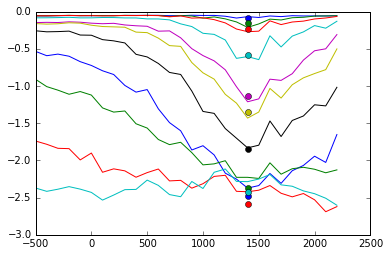

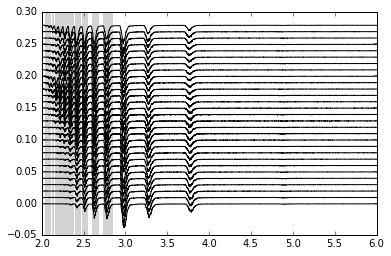

In [7]:
runNumber = [16115, 16116, 16117, 16118, 16120, 16121, 16122, 16123, 16124, 16125,
             16126, 16127, 16128, 16129, 16130, 16131, 16132, 16133, 16134, 16135,
             16136, 16137, 16138, 16139, 16140, 16142, 16143, 16144, 16145]
scan_distance = -500. + 100.*numpy.arange(len(runNumber))

#gmd_gate = [(80, 85)] * len(runNumber)
gmd_gate = [(102.5, 107.5)]

#position_gate = [(2.26, 2.31), (2.32, 2.39), (2.73, 2.84)]
position_gate = [(2.04, 2.06), (2.08, 2.10), (2.12, 2.14),
                 (2.16, 2.19), (2.199, 2.25), (2.26, 2.31), (2.32, 2.379), (2.393, 2.455),
                 (2.482, 2.545), (2.597, 2.667), (2.73, 2.84)]

In [ ]:
all_tof = []
all_idInterval = []
for rn  in runNumber:
    print("read run {0}".format(rn))
    tofSpectra0, idInterval0 = daq.allValuesOfRun(tofChannelName, rn)
    all_tof.append(tofSpectra0 * 0.8 / 2048.) # convert to V
    all_idInterval.append(idInterval0)

In [ ]:
all_gmd = []
for id_interval in all_idInterval:
    try:
        bdaEnergy= daq.valuesOfInterval(bda_energy_channel_name, id_interval)
        gmd_values = bdaEnergy[:, 0]
        all_gmd.append(gmd_values)
    except:
        all_tof = all_tof[:len(all_gmd)]
        scan_distance = scan_distance[:len(all_gmd)]
        print "Stopping after {0} gmd reads at run {1}".format(len(all_gmd), runNumber[len(all_gmd)]-1)
        break

In [ ]:
average_tof = []
tof_x = numpy.arange(20000) * 10. / 20000.
integral_plots = [[] for _ in range(len(position_gate))]
for index in range(len(all_tof)):
    average_tof.append(all_tof[index][(all_gmd[index] > gmd_gate[index][0]) * (all_gmd[index] < gmd_gate[index][1]), :].mean(axis=0))
    for window_index, g in enumerate(position_gate[:len(all_tof)]):
        integral_plots[window_index].append(average_tof[-1][(tof_x > g[0]) * (tof_x < g[1])].sum())

In [ ]:
fig = matplotlib.pyplot.figure(1)
fig.clear()
ax = fig.add_subplot(111)
for i, p in enumerate(integral_plots):
    ax.plot(scan_distance[:-1], p[:-1], label="{0} - {1}".format(position_gate[i][0], position_gate[i][1]))
for i, p in enumerate(integral_plots):
    ax.plot([scan_distance[19]], [p[-1]], "o", color=ax.lines[i].get_color())
#ax.legend()   
#fig.canvas.draw()

In [ ]:
fig2 = matplotlib.pyplot.figure(2)
fig2.clear()
ax2 = fig2.add_subplot(111)
for i, this_average_tof in enumerate(average_tof):
    ax2.plot(tof_x, this_average_tof + 0.01*i, color="black")
    ax2.set_xlim((2., 6.))
ylim = ax2.get_ylim()
for i, g in enumerate(position_gate):
    ax2.add_patch(matplotlib.patches.Rectangle((g[0], ylim[0]), g[1]-g[0], ylim[1] - ylim[0], color="lightgray"))
ax2.set_ylim(ylim)
#fig2.canvas.draw()